In [22]:
import glob

In [23]:
reproduction = ['./REST-reproduction',
                './SP1-reproduction',
                './ELK1-reproduction',
                './MYC-reproduction',
                './USF1-reproduction',
                './ZBTB7A-reproduction',
                './ARID3A-reproduction',
                './GABPA-reproduction',
                './CTCFL-reproduction']

In [26]:
num_model = 6
num_epochs = 100

all_tf_train_loss_bce = {}
all_tf_train_loss_rest = {}

for tf_idx in range(len(reproduction)):
    TF_name = reproduction[tf_idx].split('-')[0].split('/')[1]
    tf_path = reproduction[tf_idx]

    tf_test_path = []

    for exp_idx in range(num_model):
        for file in glob.glob(tf_path+'/test/{}.txt'.format(str(exp_idx))):
            tf_test_path.append(file)

    all_test_res = {}
    for exp_idx in range(num_model):
        f = open(tf_test_path[exp_idx], 'r')
        data = f.read()
        all_test_res[exp_idx] = data
        f.close()

    tf_train_loss_bce = {}
    tf_train_loss_rest = {}

    for exp_idx in range(num_model):
        tf_train_loss_bce[exp_idx] = []
        tf_train_loss_rest[exp_idx] = []

        res = all_test_res[exp_idx].split('\n')

        for line_idx in range(len(res)-1):
            train = res[line_idx].split("|")[0]
            test = res[line_idx].split("|")[1]
            tf_train_loss_bce[exp_idx].append(float(train.split(':')[1].split("+")[0]))
            tf_train_loss_rest[exp_idx].append(float(train.split(':')[1].split("+")[1]))

    tf_train_loss_bce_mean = []
    tf_train_loss_rest_mean = []

    for epoch in range(num_epochs):
        train_loss_bce_temp_sum = 0
        train_loss_rest_temp_sum = 0

        for exp_idx in range(num_model):
            train_loss_bce_temp_sum += tf_train_loss_bce[exp_idx][epoch]
            train_loss_rest_temp_sum += tf_train_loss_rest[exp_idx][epoch]
        
        tf_train_loss_bce_mean.append(train_loss_bce_temp_sum/num_model)
        tf_train_loss_rest_mean.append(train_loss_rest_temp_sum/num_model)

    all_tf_train_loss_bce[TF_name] = tf_train_loss_bce_mean
    all_tf_train_loss_rest[TF_name] = tf_train_loss_rest_mean

In [30]:
TF_NAMES = ['REST', 'SP1', 'ELK1', 'MYC', 'USF1', 'ZBTB7A', 'ARID3A', 'GABPA', 'CTCFL']

In [31]:
import matplotlib.pyplot as plt

In [41]:
TF_NAMES1 = ['SP1', 'USF1','ARID3A', 'GABPA', 'CTCFL']
TF_NAMES2 = ['REST', 'ELK1', 'MYC', 'ZBTB7A']

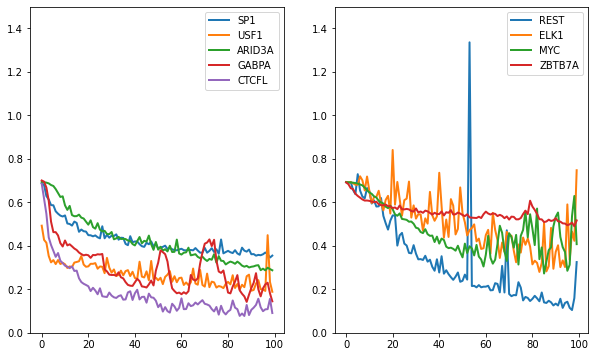

In [48]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.ylim(0, 1.5)
for i in range(len(TF_NAMES1)):
    plt.plot(all_tf_train_loss_bce[TF_NAMES1[i]], label=TF_NAMES1[i], linewidth=2)
plt.legend()
plt.subplot(1,2,2)
plt.ylim(0, 1.5)
for i in range(len(TF_NAMES2)):
    plt.plot(all_tf_train_loss_bce[TF_NAMES2[i]], label=TF_NAMES2[i], linewidth=2)
plt.legend()